In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt

In [2]:
Lx = 10.0
Ly = 5.0
dx = 0.1
dy = 0.1
D = 1.0
dt = 0.001
nx = int(Lx / dx)
ny = int(Ly / dy)
nt = 2000

 requirement ist:    2Ddt/dx**2<1 should be valid
 
Below is the first case with periodic boundary conditions along x and y

In [3]:
pin = np.zeros((nx + 2, ny + 2))


def initial_first(p):
    pin_zeros = p
    return pin_zeros


def initial_second(p):
    p[:, 0] = 20
    p[:, -1] = 10
    return p


def initial_third(p):
    x = np.linspace(0, Lx, nx + 2)
    p[:, 0] = 20 + 0.5 * (x - 5) ** 2
    p[:, -1] = 10 - 0.3 * (x - 5) ** 2
    return p

Boundary conditions

In [4]:
def boundary_cond_first(p):
    p[0, :] = p[-2, :]  #  left along x
    p[-1, :] = p[1, :]  #  right along x
    p[:, 0] = p[:, -1]  #  left along y
    p[:, -1] = p[:, 1]  #  right along y
    return p


def boundary_cond_sec_third_fourth(p):
    p[0, :] = p[-2, :]  #  left along x
    p[-1, :] = p[1, :]  #  right along x
    return p

In [5]:
def FTCS(pzero, initial, boundary_cond):
    p = initial(pzero)
    p_new = np.copy(p)
    for n in range(nt):
        p = boundary_cond(p)
        for i in range(1, nx + 1):
            for j in range(1, ny + 1):
                p_new[i, j] = (
                    p[i, j]
                    + D * dt / dx**2 * (p[i + 1, j] - 2.0 * p[i, j] + p[i - 1, j])
                    + D * dt / dy**2 * (p[i, j + 1] - 2.0 * p[i, j] + p[i, j - 1])
                )
        p[:] = p_new[:]
    return p

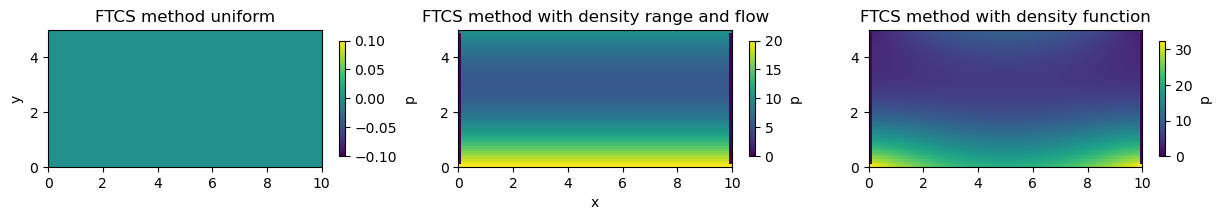

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
result0 = FTCS(pin, initial_first, boundary_cond_first)
neg0 = ax[0].imshow(
    result0.T,
    extent=[0, Lx, 0, Ly],
    origin="lower",
    cmap="viridis",
    interpolation="nearest",
)
fig.colorbar(neg0, ax=ax[0], location="right", anchor=(0, 0.5), shrink=0.3, label="p")
ax[0].set_title("FTCS method uniform")
ax[0].set_ylabel("y")

pin = np.zeros((nx + 2, ny + 2))
result1 = FTCS(pin, initial_second, boundary_cond_sec_third_fourth)
neg1 = ax[1].imshow(
    result1.T,
    extent=[0, Lx, 0, Ly],
    origin="lower",
    cmap="viridis",
    interpolation="nearest",
)
fig.colorbar(neg1, ax=ax[1], anchor=(0, 0.5), shrink=0.3, label="p")
ax[1].set_title("FTCS method with density range and flow")
ax[1].set_xlabel("x")


pin = np.zeros((nx + 2, ny + 2))
result2 = FTCS(pin, initial_third, boundary_cond_sec_third_fourth)
neg2 = ax[2].imshow(
    result2.T,
    extent=[0, Lx, 0, Ly],
    origin="lower",
    cmap="viridis",
    interpolation="nearest",
)
fig.colorbar(neg2, ax=ax[2], anchor=(0, 0.5), shrink=0.3, label="p")
ax[2].set_title("FTCS method with density function")

plt.show()

 suggested method from Fabian with faster calculations probably without loop

In [12]:
def FTCS_with_Numpy_magic(pzero, initial, boundary_cond):
    p = initial(pzero)
    p_new = np.copy(p)
    for n in range(nt):
        p = boundary_cond(p)
        # p_new = (
        #    p[1:-1, 1:-1]
        #    + D * dt / dx**2 * (p[2:, 1:-1] - 2.0 * p[1:-1, 1:-1] + p[:-2, 1:-1])
        #    + D * dt / dy**2 * (p[1:-1, 2:] - 2.0 * p[1:-1, 1:-1] + p[1:-1, :-2])
        # )
        # p[:] = p_new[:]
        p[1:-1, 1:-1] = (
            p[1:-1, 1:-1]
            + D * dt / dx**2 * (p[2:, 1:-1] - 2.0 * p[1:-1, 1:-1] + p[:-2, 1:-1])
            + D * dt / dy**2 * (p[1:-1, 2:] - 2.0 * p[1:-1, 1:-1] + p[1:-1, :-2])
        )
    return p

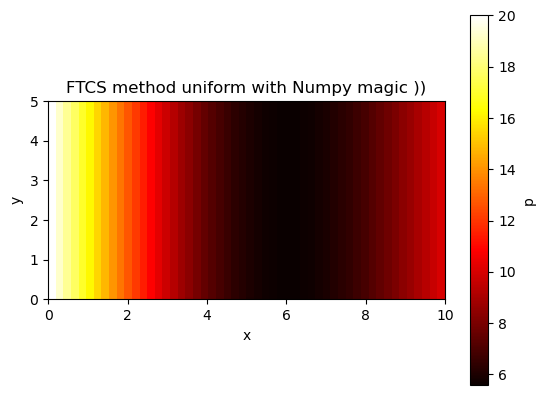

In [13]:
pin = np.zeros((nx + 2, ny + 2))
result111 = FTCS_with_Numpy_magic(pin, initial_second, boundary_cond_sec_third_fourth)
plt.imshow(
    result111,
    extent=[0, Lx, 0, Ly],
    origin="lower",
    cmap="hot",
    interpolation="nearest",
)
plt.colorbar(label="p")
plt.title("FTCS method uniform with Numpy magic ))")
plt.xlabel("x")
plt.ylabel("y")
plt.show()